# Quantum Secret sharing with classical bob

In [15]:
import numpy as np


import matplotlib.pyplot as plt
from qiskit import quantum_info as qi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob,StatevectorEstimator
from qiskit.circuit.library import TwoLocal,EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit,transpile
from qiskit import quantum_info
from qiskit_aer import AerSimulator #Importing the aersimulator in qiskit to sumulate our circuit

Initial state for the QSS protocol

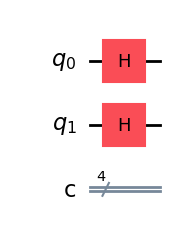

In [16]:
circuits=[] #list of circuits
n=20
for i in range (n):
    qc=QuantumCircuit(2,4)
    qc.h([0,1])
    circuits.append(qc)

circuits[2].draw("mpl")

Random choice for bob and charlie to measure or reflect his/her qubits

In [17]:
#Bob and charlie are going to measure or reflect random qubits among the 20 qubits , let us use  random function of pyhton to decide action of charlie and bob
import random

mylist = ["measure","reflect"]

bob_choices=random.choices(mylist, weights = [ 1, 1], k = 20)
charlie_choices=random.choices(mylist, weights = [ 1, 1], k = 20)
print(bob_choices)

['reflect', 'measure', 'measure', 'measure', 'reflect', 'reflect', 'measure', 'measure', 'measure', 'measure', 'reflect', 'reflect', 'measure', 'reflect', 'reflect', 'measure', 'measure', 'measure', 'measure', 'measure']


In [18]:
n=0
for i in bob_choices:
    if(i=="measure"):
       circuits[n].measure(0,0)
    n=n+1


In [19]:
n=0
for i in charlie_choices:
    if(i=="measure"):
       circuits[n].measure(1,1)
    n=n+1

bob and charlie reveals their choices to alice

After receiving the qubits back from bob and charlie , alice has 4 choices he can do with the received qubits. 

1. Measure both the qubits in Z-basis.
2. Measure bob in z-basis and charlie in X basis.
3. Measure charlie in the z-basis and bob in x-basis.
4. measure both in the x-basis.


Secret key Generation and eve detection by Alice 

In [20]:
key_q=[]
for i in range(len(bob_choices)):
    if(bob_choices[i]=="measure" and charlie_choices[i]=="measure"):
       key_q.append(i)
print(key_q)       

[3, 6, 7, 8, 9, 16, 19]


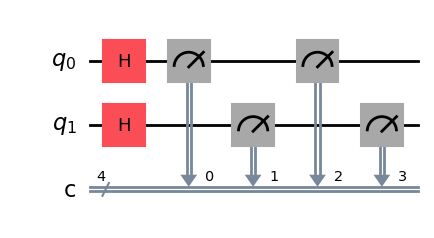

In [21]:
#For the list above alice will measure both the qubits in Z-basis
for i in key_q:
    circuits[i].measure(0,2)
    circuits[i].measure(1,3)
    

circuits[i].draw("mpl")   

In [22]:
n=0
count_list=[]
simulator_aer=AerSimulator()
for i in key_q:
        qc_aer=transpile(circuits[i],backend=simulator_aer) #transpiling the circuit based on the backend we choose
        result=simulator_aer.run(qc_aer,shots=1024).result()#runnung our circuit using the simulator

        counts=result.get_counts()#getting counts of our measurement results
        print(counts)
        l=list(counts)
        count_list.append((l[0]))
print("Randomly choosing a result out of all possible results: \n")
print(count_list)

{'0101': 243, '1010': 274, '0000': 244, '1111': 263}
{'0101': 253, '0000': 282, '1010': 248, '1111': 241}
{'1010': 247, '0101': 265, '0000': 258, '1111': 254}
{'0000': 232, '1111': 273, '0101': 273, '1010': 246}
{'0000': 240, '1010': 262, '0101': 237, '1111': 285}
{'0101': 278, '1111': 238, '1010': 244, '0000': 264}
{'1010': 247, '0101': 288, '1111': 254, '0000': 235}
Randomly choosing a result out of all possible results: 

['0101', '0101', '1010', '0000', '0000', '0101', '1010']


key generation by Alice by using XOR operation between his measurement results

In [23]:
final_key=[]
for i in count_list:
    a=int(i[2])
    b=int(i[3])
    xor = a ^ b #XOR operation
    final_key.append(xor)

print("THE FINAL KEY GENERATED BY ALICE WHICH CAN BE FOUND ONLY IF BOB AND CHARLIE COLLABORATE:",final_key)    

THE FINAL KEY GENERATED BY ALICE WHICH CAN BE FOUND ONLY IF BOB AND CHARLIE COLLABORATE: [1, 1, 1, 0, 0, 1, 1]


# Eve interception or bob/charlie tries to cheat

Let us say eve will try to get information about charlie's qubit by measuring the qubit when it travels from charlie to alice.Charlie could have done two things to the qubit
either he could have measured or he could have reflected which eve does not know.
1. If charlie had measured the eve's measurement in Z-basis would not affect so he might go unnoticed
2. If charlie had chosed reflected the state of charlie's qubit is |+> state and  if alice chooses to measure it in X-basis and if he gets a |-> state then he can detect the presence of eve (with 50% chance)
 

In [24]:
bob_reflect_charlie_meas_q=[]
for i in range (len(bob_choices)):
    if(bob_choices[i]=="reflect" and charlie_choices[i]=="measure"):
        bob_reflect_charlie_meas_q.append(i)
print("Qubits bob chose to reflect and charlie chose to measure:",bob_reflect_charlie_meas_q)        

Qubits bob chose to reflect and charlie chose to measure: []


In [25]:
#Suppose EVE randomly chooses 1 qubit of the above qubits to attack and get information
eve_attack_choices=random.choices(bob_reflect_charlie_meas_q,  k = 1)
print(eve_attack_choices)

IndexError: list index out of range

In [ ]:
for i in eve_attack_choices:
    circuits[i].measure(0,0)

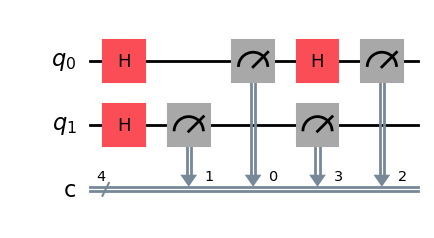

In [ ]:
#Now alice will measure these circuits in X-basis and if she gets a |-> state she can detect eve
for i in eve_attack_choices:
    circuits[i].h(0)
    circuits[i].measure(0,2)
    circuits[i].measure(1,3)
circuits[i].draw("mpl")
    

In [ ]:

simulator_aer=AerSimulator()
for i in eve_attack_choices:
        qc_aer=transpile(circuits[i],backend=simulator_aer) #transpiling the circuit based on the backend we choose
        result=simulator_aer.run(qc_aer,shots=1024).result()#runnung our circuit using the simulator

        counts=result.get_counts()#getting counts of our measurement results
        print(counts)
        l=list(counts)
       



{'0001': 121, '1010': 151, '0000': 127, '0100': 141, '1111': 123, '1110': 116, '0101': 136, '1011': 109}


As one can see if the 3rd qubit is measured 1 that means a |-> state is measured half the times,which implies that Eve can be detected half of the time and the same simulation can be done in other cases of attack as well.
